In [10]:
import torch as t
import os
import os.path as osp
import anndata as ad

In [11]:
DATA_DIR = "../data/mob/curated/"
REF_IMG_PTH = "../data/mob/references/reference.png"
REF_LMK_PTH = "../data/mob/references/landmarks.tsv"

adatas = {p.split(".")[0]:ad.read_h5ad(osp.join(DATA_DIR,p)) for p in os.listdir(DATA_DIR)}
adatas = {f"Rep{k}_MOB" : adatas[f"Rep{k}_MOB"] for k \
          in sorted([ int(a.lstrip("Rep_").rstrip("_MOB")) for a in adatas.keys()])}

In [17]:
class AE(t.nn.Module):
    def __init__(self,n_features):
        super().__init__()
        
        self.n_features = n_features
          
        self.encoder = t.nn.Sequential(
            t.nn.Linear(self.n_features, 64),
            t.nn.ReLU(),
            t.nn.Linear(64, 36),
            t.nn.ReLU(),
            t.nn.Linear(36, 18),
            t.nn.ReLU(),
            t.nn.Linear(18, 10)
        )
        
        self.decoder = t.nn.Sequential(
            t.nn.Linear(10, 18),
            t.nn.ReLU(),
            t.nn.Linear(18, 36),
            t.nn.ReLU(),
            t.nn.Linear(36, 64),
            t.nn.ReLU(),
            t.nn.Linear(64, self.n_features),
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [18]:
data1 = adatas["Rep1_MOB"]

In [19]:
# Model Initialization
model = AE(n_features=data1.shape[1])
  
# Validation using MSE Loss function
loss_function = t.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = t.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [45]:
epochs = 20
outputs = []
losses = []
original = t.tensor(data1.X)
for epoch in range(epochs):
            
      # Output of Autoencoder
    reconstructed = model(original)
        
      # Calculating the loss function
    loss = loss_function(reconstructed, original)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
      # Storing the losses in a list for plotting
    losses.append(loss)
    outputs.append((epochs, original, reconstructed))
  


In [37]:
losses_i = [l.item() for l in losses]

In [38]:
import matplotlib.pyplot as plt

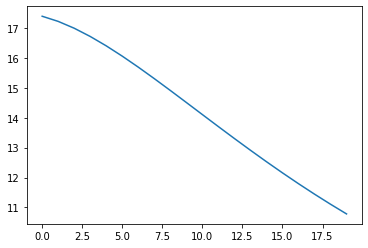

In [39]:
plt.plot(losses_i)

In [46]:
re = reconstructed.detach().numpy().reshape(X.shape)


In [53]:
import numpy as np

(-0.5, 16572.5, 266.5, -0.5)

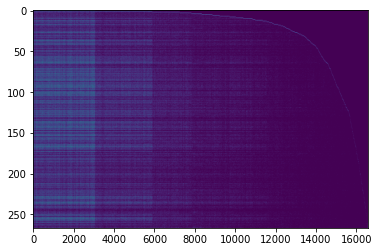

In [54]:
plt.imshow(np.log1p(X))
plt.axis("auto")

(-0.5, 16572.5, 266.5, -0.5)

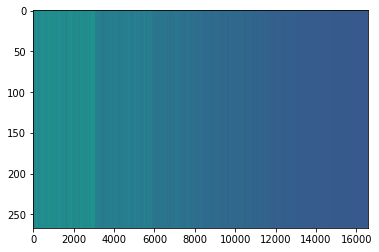

In [55]:
plt.imshow(np.log1p(re))
plt.axis("auto")